# Metro Bike Share -- Relationships Exploring

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Relationships Exploring
     Correlation Matrix Heatmap
     Scatterplots
     Pair Plots
     Categorical Plots
#### 3. Business Questions and Hypotheses
    

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path

path= r'C:\Users\ashan\OneDrive\桌面\Data Analytic\Metro Bike Share' 

In [3]:
# Import data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cleaned_2023.csv'), index_col = 0)

In [4]:
df.head()

,trip_id,duration,fare_without_discount,start_time,month,day_of_month,time_of_start,day_of_week,end_time,start_station,...,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,fare,subscription
0,231787362,9,1.75,1/1/2023 0:41,1,1,0,1,1/1/2023 0:50,4204,...,4210,33.984341,-118.471550,23373,30,One Way,Monthly Pass,electric,0.00,17
1,231801471,97,7.00,1/1/2023 1:05,1,1,1,1,1/1/2023 2:42,3054,...,3054,34.039219,-118.236488,13870,1,Round Trip,Walk-up,standard,7.00,0
2,231794062,15,1.75,1/1/2023 1:11,1,1,1,1,1/1/2023 1:26,3037,...,3068,34.053200,-118.250954,23942,1,One Way,Walk-up,electric,2.75,0
3,231794664,26,1.75,1/1/2023 1:31,1,1,1,1,1/1/2023 1:57,3063,...,4454,34.017899,-118.291718,22873,1,One Way,Walk-up,electric,2.75,0
4,231794562,8,1.75,1/1/2023 1:44,1,1,1,1,1/1/2023 1:52,3066,...,3026,34.063179,-118.245880,14790,1,One Way,Walk-up,standard,1.75,0


In [5]:
df.shape

(433658, 22)

## 2. Relationships Exploring

### Correlation Matrix Heatmap

In [6]:
df.columns

Index(['trip_id', 'duration', 'fare_without_discount', 'start_time', 'month',
       'day_of_month', 'time_of_start', 'day_of_week', 'end_time',
       'start_station', 'start_lat', 'start_lon', 'end_station', 'end_lat',
       'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'bike_type', 'fare', 'subscription'],
      dtype='object')

In [7]:
# Rename columns whose names are too long

df.rename(columns = {'fare_without_discount' : 'fare_n'}, inplace = True)

In [8]:
df.dtypes

trip_id                  int64
duration                 int64
fare_n                 float64
start_time              object
month                    int64
day_of_month             int64
time_of_start            int64
day_of_week              int64
end_time                object
start_station            int64
start_lat              float64
start_lon              float64
end_station              int64
end_lat                float64
end_lon                float64
bike_id                  int64
plan_duration            int64
trip_route_category     object
passholder_type         object
bike_type               object
fare                   float64
subscription             int64
dtype: object

In [9]:
# Create a subset for bike trip duration, fare without discount, and fare with discount

sub = df[['fare_n', 'plan_duration','subscription','duration']]

In [10]:
# Create a correlation matrix.

sub.corr()

,fare_n,plan_duration,subscription,duration
fare_n,1.000000,-0.085241,-0.092945,0.994517
plan_duration,-0.085241,1.000000,0.993248,-0.098669
subscription,-0.092945,0.993248,1.000000,-0.106731
duration,0.994517,-0.098669,-0.106731,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

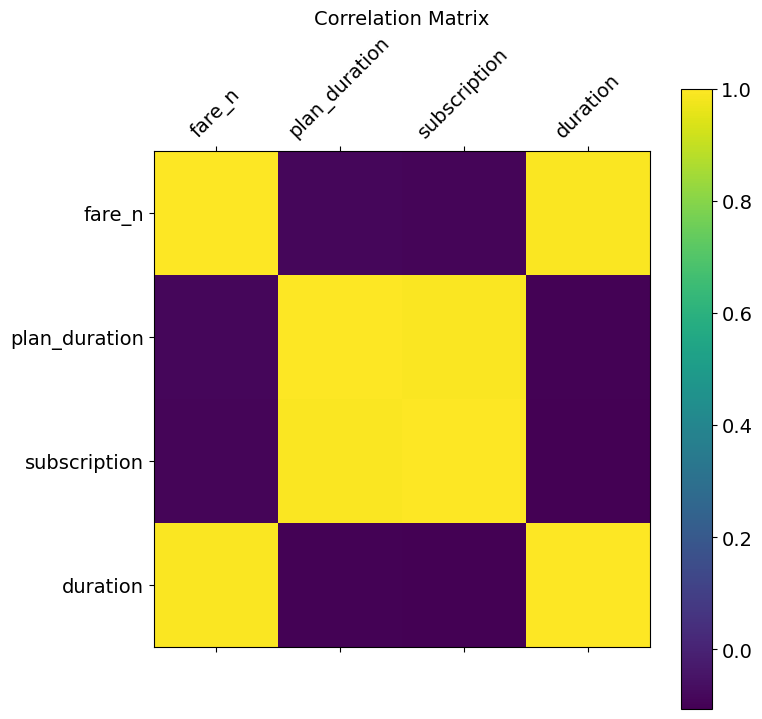

In [11]:
# Create a correlation heatmap using matplotlib 

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

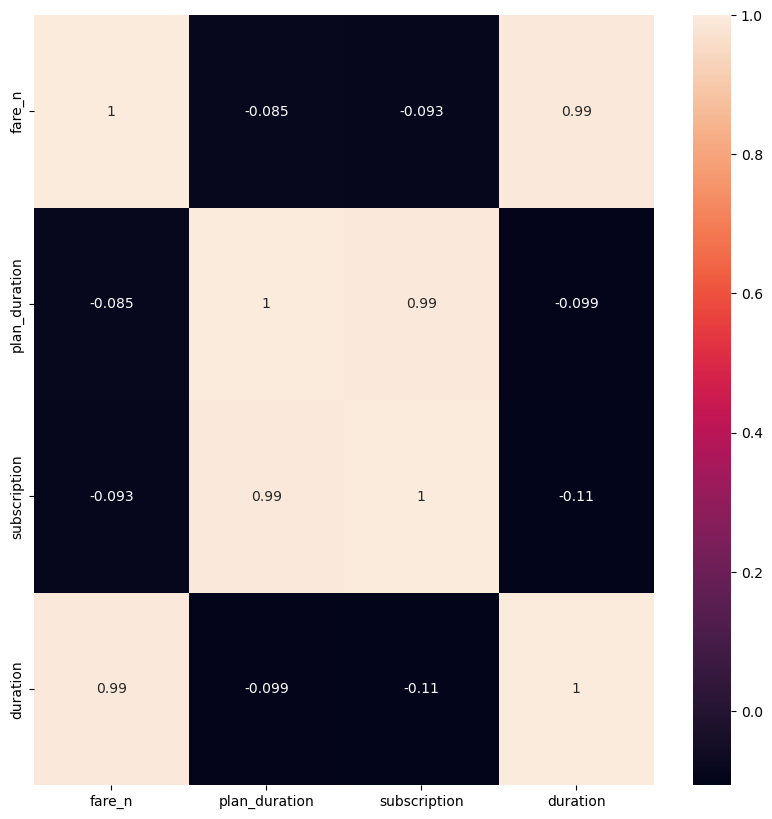

In [12]:
# Create a correlation heatmap with seaborn.

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.


##### Correlation Analysis
Four numerical columns-- 'duration', 'plan_duraion', 'subscription', and 'fare_without_discount' are put together for analysis. In general, the relationships between these four variables are straightforwarded-- strong positive correlation or almost no relationship. The bike trip fare has strong relationship with the trip duration, and the plan_duaration are positive related to subscription fee. 


Some key points:
* Annual Pass or Monthly Pass holders do not necessary take longer bike trips than casual walk-up riders.
* Longer bike trip result in a higher amount of trip fare.
* The Pass duration is longer, the subscription fee is higher.

### Scatterplots

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


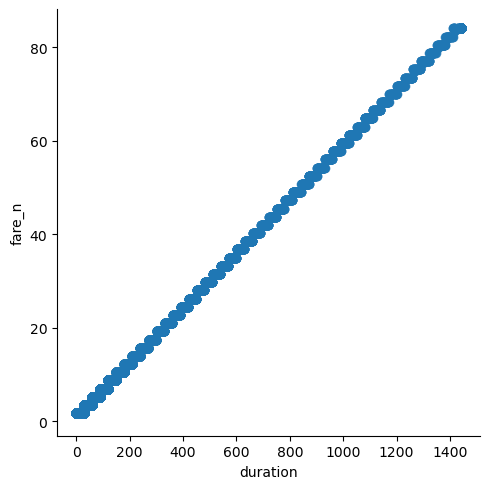

In [13]:
# Create a scatterplot for the bike trip "duration" and bike trip "fare_without_discount" columns in seaborn

sns.lmplot(x = 'duration', y = 'fare_n', data = df)

##### The bike trip duration has a strong positive relationship with the bike trip fare. The longer trip duration, the higher amount of the trip fare.

### Pair Plots

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

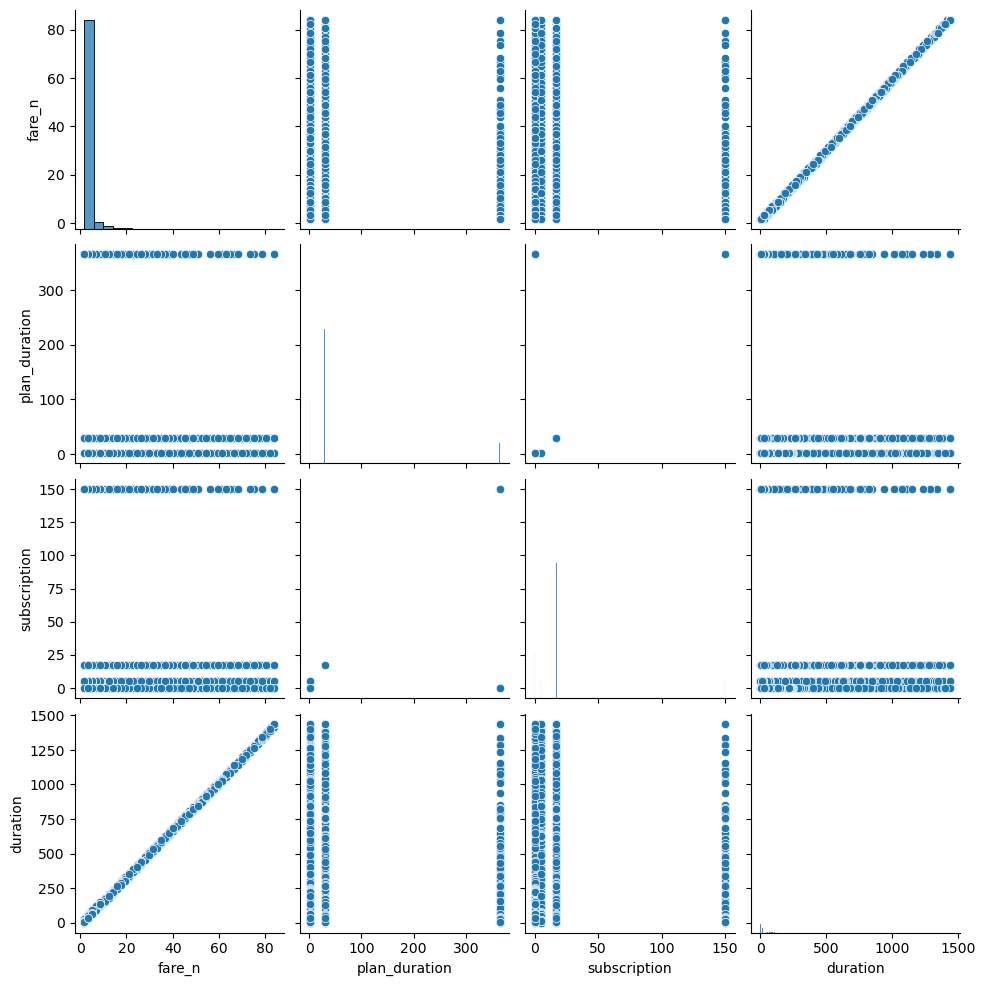

In [14]:
# Create a pair plot with numerical columns subset

g = sns.pairplot(sub)

##### Key Points of the Pair Plots
* The distributions of fare_n, plan_duration, and subscription are all highly concentrated in this pair plots. 
* The most distinguishable plot is the fare_n variable. The data point of the trip fare are right-skewed with a short tail in the higher value. 
* The plots of plan_duration, and subscription display a categorized attribute. 
* The distribution of duration is hard to tell, but it would be worth to have further exploration because of its independency. Despite the strong positive reationship between trip fare and trip duration, the longer duration, the fewer data points appear in subscription and the plan_duration.  









### Categorical Plots

Categorize 'duration'

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Count'>

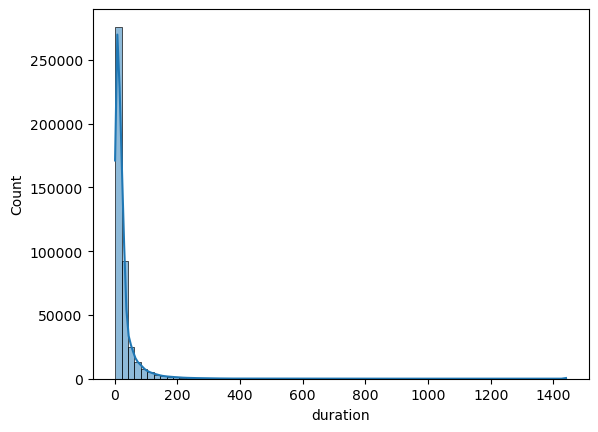

In [15]:
# Use a histogram to visualize the distribution of 'duration'

sns.histplot(df['duration'], bins = 70, kde = True)

In [16]:
# Check 'duration' statistics

df['duration'].describe()

count    433658.000000
mean         30.739873
std          78.917649
min           1.000000
25%           7.000000
50%          15.000000
75%          28.000000
max        1440.000000
Name: duration, dtype: float64

In [17]:
# Define a new data frame that capping the bike trip within 4 hours(240 minutes) to filter outliers in the dataset.

filtered_df = df[df['duration'] <= 240]

In [18]:
# Define 'duration' into three levels

filtered_df.loc[filtered_df['duration'] < 30, 'Duration category'] = 'Short trip' # Less than 30 min, short trip

C:\Users\ashan\AppData\Local\Temp\ipykernel_23452\2471347308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['duration'] < 30, 'Duration category'] = 'Short trip' # Less than 30 min, short trip


In [19]:
filtered_df.loc[(filtered_df['duration'] >= 30) & (filtered_df['duration'] <= 120), 'Duration category'] = 'Medium trip'

In [20]:
filtered_df.loc[filtered_df['duration'] > 120, 'Duration category'] = 'Long trip'  # Over 2hrs, long trip

In [21]:
filtered_df['Duration category'].value_counts()

Duration category
Short trip     335585
Medium trip     83094
Long trip       10252
Name: count, dtype: int64

In [22]:
filtered_df.columns

Index(['trip_id', 'duration', 'fare_n', 'start_time', 'month', 'day_of_month',
       'time_of_start', 'day_of_week', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'fare', 'subscription', 'Duration category'],
      dtype='object')

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


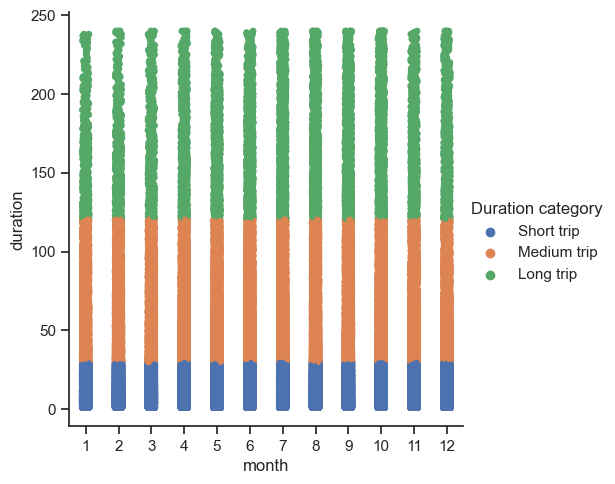

In [23]:
sns.set(style="ticks")
g = sns.catplot(x= 'month', y= 'duration', hue="Duration category", data=filtered_df)

##### The trip duration categories distribute evenly on monthly bases. There's no preferance for riders to take longer or shorter trip in specific month or season. I expected to see SHORT trips arise during summer, but the plot proved that my hypothesis was wrong.

## 3. Business questions and more hypothesis

#### Business Questions
###### 1.	Which bike stations have the most or least bike trips?

###### 	2. Any months, days and time have more bike trips? 
* Following visualizations have answers.

###### 3. Does bike trips relate to tourism seasons, and how does these two relate? 
* Tourism season tend to have more bike trips.

###### 4. Any popular bike trips route?

###### 5. Any pattern of bike trips for casual riders and frequent riders?

###### 6. Trip fare for casual riders. 

###### 7. Trip duration trend. 
* Bike trip duration are nor affected by tourism season, but bike trips are affected.


C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Count'>

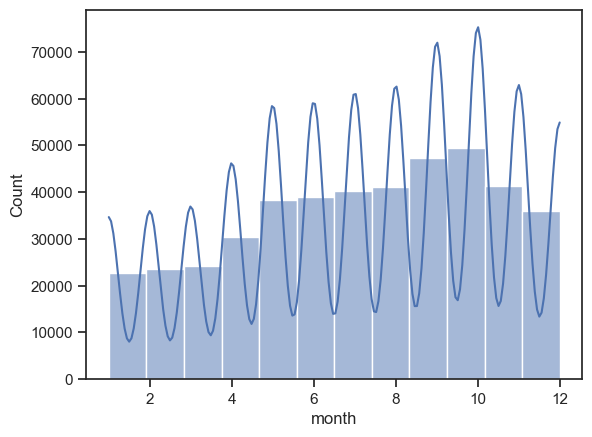

In [24]:
# Bike trip distribution by month
sns.histplot(df['month'], bins = 12, kde = True)

# May to October have more bike trips than other months.

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day_of_week', ylabel='Count'>

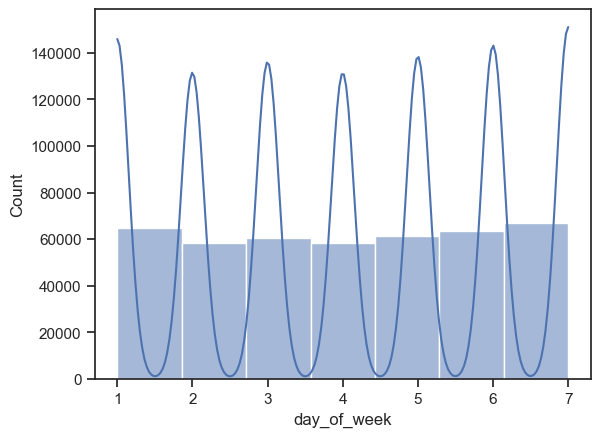

In [25]:
# Bike trips during a week.
sns.histplot(df['day_of_week'], bins = 7, kde = True)

# Bike trips distribute evenly during a week. No specific day for more bike trips.

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_of_start', ylabel='Count'>

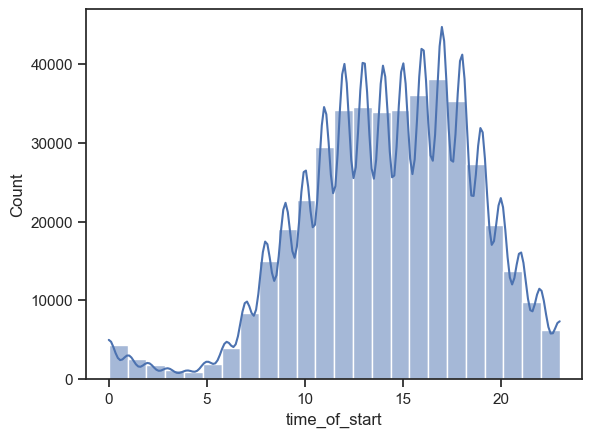

In [26]:
# Bike trips during a day.
sns.histplot(df['time_of_start'], bins = 24, kde = True)

# More bike trips occured 9 am. to 7 pm. during a day.

###### More Hypothesis
1. More short bike trips occure in residential area, while long trips occure in touristy area.

2. Residential areas are more likely have stable duration bike trip for peoeple who use bike to commute. 